In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df.drop("target",axis=1)
y = df["target"]
print(X.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [4]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [6]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [7]:
# Models to test

models = {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest Classifier": RandomForestClassifier()}

In [8]:
# Function to fit and evaluate model

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits Machine Learning models on training data and returns their scores on testing data.
    
    models: Takes a dictionary with Scikit-Learn ML model names and their respective functions as input.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    
    """
    np.random.seed(42)
    model_score={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name]=model.score(X_test, y_test)
    return model_score

In [9]:
model_score = fit_and_evaluate(models = models, X_train = X_train, X_test = X_test, 
                y_train = y_train, y_test = y_test)

C:\Users\shubh\Desktop\ML_ZeroToMastery\Heart-Disease-Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [11]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest Classifier,0.836066


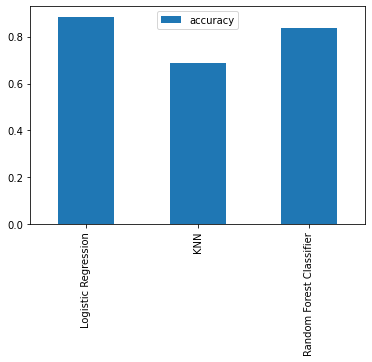

In [12]:
model_compare2 = pd.DataFrame(model_score, index=["accuracy"])
model_compare2.T.plot.bar();
model_compare2.T

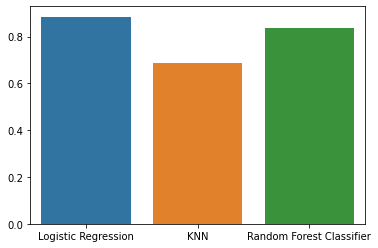

In [13]:
sns.barplot(data=model_compare)

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

### Hyperparameter tuning of K Nearest Neighbors Classifier

### Hyperparameter tuning (by hand)

In [14]:
train_score = []
test_score = []
np.random.seed(42)
knn= KNeighborsClassifier()
neighbors = range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [15]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [16]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

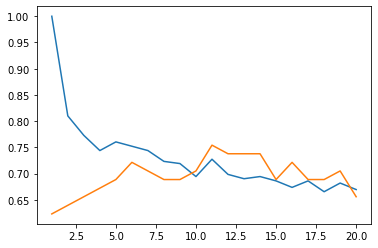

In [17]:
sns.lineplot(x = neighbors, y = train_score)
sns.lineplot(x = neighbors, y = test_score)

In [18]:
max(test_score)

0.7540983606557377

Maximum KNN score on the test data: 75.41%


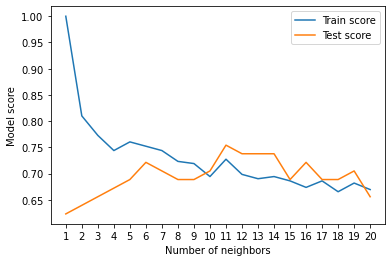

In [19]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

### Hyperparameter tuning using automated methods (GridSearchCV and RandomizedSearchCV)

In [20]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
np.random.seed(42)
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print("Best model accuracy: ", clf.score(X_test,y_test))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 7
Best model accuracy:  0.8032786885245902


In [21]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree','kd_tree','brute']
np.random.seed(42)
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights=weights, algorithm = algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=6, verbose=True)
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])
print("Best model accuracy: ", clf.score(X_test,y_test))
print("Best parameters : ", clf.best_params_)

Fitting 6 folds for each of 22736 candidates, totalling 136416 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 136416 out of 136416 | elapsed: 14.5min finished


Best leaf_size: 1
Best p: 1
Best n_neighbors: 5
Best weights: distance
Best algorithm: auto
Best model accuracy:  0.7213114754098361
Best parameters :  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [23]:
print("Best parameters : ", best_model.best_params_,"  using rd_knn: ", clf.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test), "  using rd_knn: ", clf.score(X_test, y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train), "  using rd_knn: ", clf.score(X_train, y_train))


Best parameters :  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}   using rd_knn:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best model accuracy on test data:  0.7213114754098361   using rd_knn:  0.7213114754098361
Best model accuracy on train data:  1.0   using rd_knn:  1.0


In [203]:
# np.random.seed(42)

#hyperparameter dictionary to tune
knn_grid = {"leaf_size": list(range(20,200)),
                  "n_neighbors": [5, 7, 9, 11, 13, 21],
                    "p":[1,2],
                  "weights":['uniform'],
                  "algorithm": ['ball_tree','kd_tree']}

#Create new KNN object
knn_3 = KNeighborsClassifier()

rd_knn = RandomizedSearchCV(knn_3,
                           param_distributions = knn_grid,
                           cv=5,
                           n_iter = 60,
                            verbose = True
                           )
best_model = rd_knn.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.6s finished


In [204]:
print("Best parameters : ", best_model.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train))


Best parameters :  {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 348, 'algorithm': 'ball_tree'}
Best model accuracy on test data:  0.7049180327868853
Best model accuracy on train data:  0.7933884297520661


In [223]:

np.random.seed(42)
#Convert to dictionary
knn_grid = {"leaf_size": list(range(20,200)),
                  "n_neighbors": [5, 7, 9, 11, 13, 21],
                    "p":[1,2],
                  "weights":['uniform'],
                  "algorithm": ['ball_tree','kd_tree']}

#Create new KNN object
knn_4 = KNeighborsClassifier()
#Use GridSearch
gd_knn = GridSearchCV(knn_4, knn_grid, cv=7, verbose=True)
best_model = gd_knn.fit(X_train,y_train)

Fitting 7 folds for each of 4320 candidates, totalling 30240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30240 out of 30240 | elapsed:  3.0min finished


In [224]:
print("Best parameters : ", best_model.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train))


Best parameters :  {'algorithm': 'ball_tree', 'leaf_size': 104, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best model accuracy on test data:  0.7049180327868853
Best model accuracy on train data:  0.7933884297520661


In [209]:
model_knn={"KNN":KNeighborsClassifier(n_neighbors=11)}
model_score_knn = fit_and_evaluate(models = model_knn, X_train = X_train, X_test = X_test, 
                y_train = y_train, y_test = y_test)


In [210]:
model_score_knn

{'KNN': 0.7540983606557377}

In [220]:
knn_5 = KNeighborsClassifier(n_neighbors=11,leaf_size=104,algorithm="ball_tree",p=1).fit(X_train,y_train)
knn_5.score(X_test,y_test), knn_5.score(X_train,y_train)


(0.7704918032786885, 0.7272727272727273)

In [221]:

np.random.seed(42)
#Convert to dictionary
knn_grid = {"leaf_size": list(range(20,200)),
                  "n_neighbors": [5, 7, 9, 11, 13, 21],
                    "p":[1,2],
                  "weights":['uniform'],
                  "algorithm": ['ball_tree','kd_tree']}

#Create new KNN object
knn_4 = KNeighborsClassifier()
#Use GridSearch
gd_knn = GridSearchCV(knn_4, knn_grid, cv=7, verbose=True)
best_model = gd_knn.fit(X,y)

Fitting 7 folds for each of 4320 candidates, totalling 30240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30240 out of 30240 | elapsed:  3.2min finished


In [222]:
print("Best parameters : ", best_model.best_params_)
print("Best model accuracy on test data: ", best_model.score(X_test,y_test))
print("Best model accuracy on train data: ", best_model.score(X_train,y_train))


Best parameters :  {'algorithm': 'ball_tree', 'leaf_size': 33, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best model accuracy on test data:  0.8032786885245902
Best model accuracy on train data:  0.7851239669421488


In [225]:
knn_6 = KNeighborsClassifier(n_neighbors=7,leaf_size=33,algorithm="ball_tree",p=1).fit(X_train,y_train)


(0.7049180327868853, 0.7272727272727273)

In [226]:
knn_6.score(X_test,y_test), knn_6.score(X_train,y_train)

(0.7049180327868853, 0.7520661157024794)

# NOTE : 

During the above experimentation of hyperparameter tuning on KNN classifier we came to know that sometimes the model may perform better on training data than on testing data 
> [for eg when {n_neighbors=11,leaf_size=104,algorithm="ball_tree",p=1} are used as parameter the accuracy on test and train data respectively is (0.7704918032786885, 0.7272727272727273)].

> When {'algorithm': 'ball_tree', 'leaf_size': 104, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} are used as parameter the accuracy on test and train data respectively is (0.7049180327868853, 0.7520661157024794)

The GridSearchCV finds the hyperparameters that best fit the training data not the test data so it might miss parameters that perform better on test data than training data and so, sometimes we might obtain better results on test data with hyperparameter tuning with hand.

**This is just to clear the doubt that why we get better results when we tune by hand than when doing exhaustive search. This doesn't mean that getting higher accuracy on test data than training data is correct.**

## Hyperparameter tuning for: 
* ### LogisticRegression() 
* ### RandomRandomForestClassifier()

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV